In [18]:
# Importing Necessary files 
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./archive/train.csv')
df_test = pd.read_csv('./archive/test.csv')

In [3]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
df.shape

(7352, 563)

In [5]:
# check for null vales
df.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [6]:
# data preprocessing 
# find the data types and do one hot encoding using dummy variable

df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [8]:
data = df.iloc[:,:-1].values
type(data)
data.shape

(7352, 562)

In [9]:
cov = np.cov(data , rowvar =False)

In [10]:
cov.shape

(562, 562)

In [19]:
# check the determinant
np.linalg.det(cov)

-0.0

In [20]:
df["Activity"].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [12]:
df.groupby("Activity").groups

{'LAYING': [51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, ...], 'SITTING': [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 716, ...], 'STANDING': [0,

In [15]:
# data points for all the standing activities
df.iloc[df.groupby("Activity").groups["STANDING"],:]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,0.274527,-0.032259,-0.110678,-0.990631,-0.687065,-0.885434,-0.991251,-0.676243,-0.864352,-0.935640,...,-0.857197,-0.011990,0.215740,0.867603,-0.868352,-0.888077,0.173534,-0.000707,30,STANDING
7196,0.270246,-0.067724,-0.147258,-0.990453,-0.774064,-0.926984,-0.991050,-0.793255,-0.922003,-0.937346,...,-0.668811,-0.022586,-0.039992,0.725042,-0.744780,-0.880750,0.179059,0.001008,30,STANDING
7197,0.274422,-0.021115,-0.096432,-0.993005,-0.907217,-0.937185,-0.994032,-0.909919,-0.929252,-0.938918,...,-0.492137,0.049622,-0.053859,-0.582824,-0.655946,-0.857129,0.196654,0.009921,30,STANDING
7198,0.274834,-0.014149,-0.080437,-0.978700,-0.871865,-0.903318,-0.984797,-0.906035,-0.908251,-0.907795,...,-0.037792,0.051835,0.102538,-0.639664,-0.860865,-0.852759,0.199518,0.007930,30,STANDING


In [16]:
# Distribution for each class
df.groupby("Activity").count()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
Activity,,,,,,,,,,,,,,,,,,,,,
LAYING,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407,...,1407,1407,1407,1407,1407,1407,1407,1407,1407,1407
SITTING,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,...,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286
STANDING,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374,...,1374,1374,1374,1374,1374,1374,1374,1374,1374,1374
WALKING,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,...,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226
WALKING_DOWNSTAIRS,986,986,986,986,986,986,986,986,986,986,...,986,986,986,986,986,986,986,986,986,986
WALKING_UPSTAIRS,1073,1073,1073,1073,1073,1073,1073,1073,1073,1073,...,1073,1073,1073,1073,1073,1073,1073,1073,1073,1073


In [23]:
# reduce dimentionality to avoid redundant features
# Applying PCA
pca = PCA(n_components = 100)
cov_pca = pca.fit(df.iloc[:,:-1].values)

In [25]:
data_train = cov_pca.transform(df.iloc[:,:-1].values)
data_test = cov_pca.transform(df_test.iloc[:,:-1].values)

In [30]:
# covert back to panda df 
df_train_red = pd.DataFrame(data_train)
df_train_red["Activity"] = df["Activity"]

In [31]:
df_train_red.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Activity
0,15.727224,-7.246259,-0.465589,-1.453681,1.419954,1.488152,-0.306350,0.457409,0.523195,-1.138727,...,0.210569,-0.107290,-0.293114,0.095059,-0.136618,-0.195966,-0.223445,0.081854,0.062477,STANDING
1,15.723317,-7.260690,-0.259002,-1.850986,0.753819,0.720199,0.685615,-0.655772,-0.919083,-0.449042,...,0.095268,0.027578,-0.009648,0.050434,-0.135463,-0.201281,0.067991,0.002192,-0.211923,STANDING
2,15.742570,-7.204006,0.106483,-2.071934,0.621699,0.256556,-0.109675,-0.016776,-0.017898,0.053206,...,0.248367,0.118563,-0.130135,0.172564,-0.169288,-0.155725,0.059753,0.142753,0.020572,STANDING
3,15.715666,-7.403807,0.719931,-1.951593,0.233804,0.800208,1.036670,-0.280322,-0.804074,0.420023,...,0.074590,1.077105,0.407208,0.233777,0.009583,0.565816,-0.148068,0.109841,0.516909,STANDING
4,15.703153,-7.473707,0.987220,-2.076101,0.282271,0.511927,0.415493,-0.189274,-0.172830,0.382604,...,0.120536,0.003556,-0.125028,0.126236,0.052296,0.033147,0.138100,0.240225,-0.208851,STANDING


In [32]:
df_train_red_STAND = df_train_red[df_train_red["Activity"]=="STANDING"]
df_train_red_SIT = df_train_red[df_train_red["Activity"]=="SITTING"]
df_train_red_WALK = df_train_red[df_train_red["Activity"]=="WALKING"]
df_train_red_LAY = df_train_red[df_train_red["Activity"]=="LAYING"]
df_train_red_WALKD = df_train_red[df_train_red["Activity"]=="WALKING_DOWNSTAIRS"]
df_train_red_WALKU = df_train_red[df_train_red["Activity"]=="WALKING_UPSTAIRS"]

In [34]:
print(df_train_red_STAND.shape)
print(df_train_red_SIT.shape)

(1374, 101)
(1286, 101)


In [35]:
df_test.dropna(inplace=True)

In [36]:
# covert test data back to panda df 
df_test_red = pd.DataFrame(data_test)
df_test_red["Activity"] = df_test["Activity"]

In [37]:
df_test_red.shape

(2947, 101)

In [38]:
# Calculating true labels 
labels_true = []
for i in range(len(df_test_red)):
    if (df_test_red["Activity"].iloc[i] == 'STANDING'):
        labels_true.append(0)
    if (df_test_red["Activity"].iloc[i] == 'SITTING'):
        labels_true.append(1)
    if (df_test_red["Activity"].iloc[i] == 'WALKING'):
        labels_true.append(2)
    if (df_test_red["Activity"].iloc[i] == 'LAYING'):
        labels_true.append(3)
    if (df_test_red["Activity"].iloc[i] == 'WALKING_DOWNSTAIRS'):
        labels_true.append(4)
    if (df_test_red["Activity"].iloc[i] == 'WALKING_UPSTAIRS'):
        labels_true.append(5)   
labels_true = np.array(labels_true)
labels_true

array([0, 0, 0, ..., 5, 5, 5])

In [40]:
pip install hmmlearn

     |████████████████████████████████| 155 kB 2.3 MB/s eta 0:00:01
  Created wheel for hmmlearn: filename=hmmlearn-0.2.6-cp38-cp38-macosx_10_14_x86_64.whl size=126308 sha256=c79787f2d5a2d596799767d9557b1e4d31ad651d7a31096360a1e90e9c9f2246
  Stored in directory: /Users/ashokdayal/Library/Caches/pip/wheels/fe/30/0f/1510fa2023cf2003ab4b971b3ac3fca7e93771aace0bf6fef9
Successfully built hmmlearn
Note: you may need to restart the kernel to use updated packages.


In [41]:
# Implementing hmm model
from hmmlearn import hmm

In [59]:
# Fitting for each activity
def HMM_F1score(N,M,labels_true):
    hmm_stand=hmm.GMMHMM(n_components=N,n_mix = M)
    hmm_sit=hmm.GMMHMM(n_components=N,n_mix = M)
    hmm_walk=hmm.GMMHMM(n_components=N,n_mix = M)
    hmm_lay=hmm.GMMHMM(n_components=N,n_mix = M)
    hmm_walk_d=hmm.GMMHMM(n_components=N,n_mix = M)
    hmm_walk_u=hmm.GMMHMM(n_components=N,n_mix = M)
    
    hmm_stand.fit(df_train_red_STAND.iloc[:,0:100].values)
    hmm_sit.fit(df_train_red_SIT.iloc[:,0:100].values)
    hmm_walk.fit(df_train_red_WALK.iloc[:,0:100].values)
    hmm_lay.fit(df_train_red_LAY.iloc[:,0:100].values)
    hmm_walk_d.fit(df_train_red_WALKD.iloc[:,0:100].values)
    hmm_walk_u.fit(df_train_red_WALKU.iloc[:,0:100].values)
    
    #calculating F1 score
    labels_predict =[]
    for i in range(len(df_test_red)):
        log_likelihood_value = np.array([hmm_stand.score(df_test_red.iloc[i,0:100].values.reshape((1,100))),
                                         hmm_sit.score(df_test_red.iloc[i,0:100].values.reshape((1,100))),
                                         hmm_walk.score(df_test_red.iloc[i,0:100].values.reshape((1,100))),
                                         hmm_lay.score(df_test_red.iloc[i,0:100].values.reshape((1,100))),
                                         hmm_walk_d.score(df_test_red.iloc[i,0:100].values.reshape((1,100))),
                                         hmm_walk_u.score(df_test_red.iloc[i,0:100].values.reshape((1,100)))])
        labels_predict.append(np.argmax(log_likelihood_value))
    labels_predict = np.array(labels_predict)
    
    F1 = f1_score(labels_true,labels_predict,average = 'micro')
    acc = accuracy_score(labels_true,labels_predict)
    return F1,acc

In [60]:
states =np.arange(1,36,1)
states

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35])

HMM is trained for states =1
HMM is trained for states =2
HMM is trained for states =3
HMM is trained for states =4
HMM is trained for states =5
HMM is trained for states =6
HMM is trained for states =7
HMM is trained for states =8
HMM is trained for states =9
HMM is trained for states =10
HMM is trained for states =11
HMM is trained for states =12
HMM is trained for states =13
HMM is trained for states =14
HMM is trained for states =15
HMM is trained for states =16
HMM is trained for states =17
HMM is trained for states =18
HMM is trained for states =19
HMM is trained for states =20
HMM is trained for states =21
HMM is trained for states =22
HMM is trained for states =23
HMM is trained for states =24
HMM is trained for states =25
HMM is trained for states =26
HMM is trained for states =27
HMM is trained for states =28
HMM is trained for states =29
HMM is trained for states =30
HMM is trained for states =31
HMM is trained for states =32
HMM is trained for states =33
HMM is trained for 

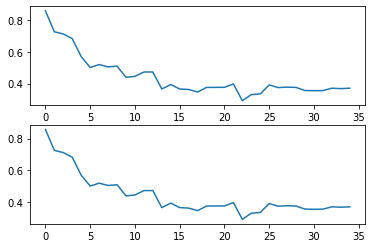

In [61]:
# training seperately and than combining 
F1_value_states = []
acc_value_states = []
for i in states:
    print("HMM is trained for states ={}".format(i))
    f1,acc = HMM_F1score(i,1,labels_true)
    F1_value_states.append(f1)
    acc_value_states.append(acc)
fig,ax = plt.subplots(2,1)

ax[0].plot(F1_value_states)
ax[1].plot(acc_value_states)

plt.show()
    

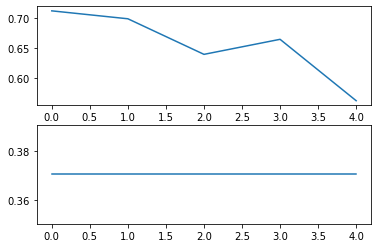

In [64]:
f1_test =[]
acc_test =[]

for i in range(1,6):
    f1,acc1 =HMM_F1score(3,i,labels_true)
    f1_test.append(f1)
    acc_test.append(acc)
    
fig,ax = plt.subplots(2,1)

ax[0].plot(f1_test)
ax[1].plot(acc_test)

plt.show()

In [65]:
f1_val,acc_val = HMM_F1score(3,8,labels_true)
print(f1_val)
print(acc_val)

0.5256192738378012
0.5256192738378012
